12.5 a Average path length and clustering coefficient of Watts–Strogatz
small-world graphs

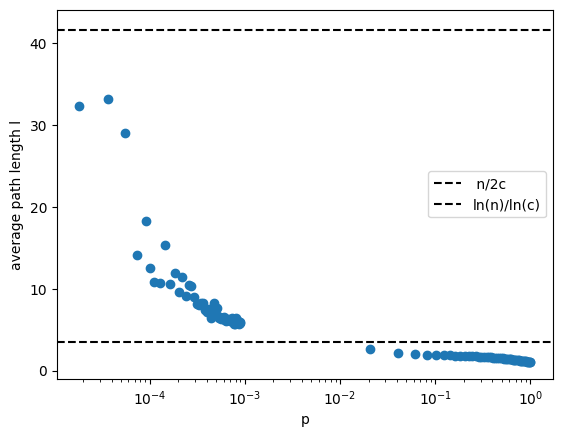

In [1]:
import numpy as np
import matplotlib.pyplot as plt

p_list1= np.linspace(0,0.0009,50)
p_list2= np.linspace(0.0001, 1, 50)

p_list = np.concatenate((p_list1, p_list2))
# p_list = np.linspace(0.1,1,10)

def check_for_off_diagonal_terms1(a):
    n = len(a)
    for i in range(n):
        for j in range(n):
            if i != j and a[i][j] == -1:
                return True  
    return False

def compute_average_path_l (a):
    length =0
    for i in range(n):
        for j in range(n):
            if i!=j:
                length+= a[i][j]
    length= length/(n**2-n)
    return length

# def analyticalvalue_1()
def watts_strogatz_graph(n, k, p):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1,n):
            if np.random.rand() < p:
                A[i,j] = 1
                A[j,i] = 1
        # do the nearest neighbour connections
        for b in range(c):
            # c describes how many connections in total, so we need to divide by 2 to get the number of connections per side
            A[i,(i+int(b/2)+1)%n] = 1
            A[(i+int(b/2)+1)%n,i] = 1

    return A

def calculate_clustering_coefficient(adjacency_matrix):
    n = len(adjacency_matrix)

    a_cube = np.matmul(np.matmul(adjacency_matrix, adjacency_matrix), adjacency_matrix)
    closed_triangles = np.trace(a_cube)

    degrees = np.sum(adjacency_matrix, axis=0)

    all_triangles = np.sum(np.square(degrees) - degrees)

    clustering_coefficient = closed_triangles / all_triangles if all_triangles > 0 else 0.0

    return clustering_coefficient


n=500
c=6
average_length_list=[]
c_list=[]
for p in p_list:
    amatrix = watts_strogatz_graph(n, c, p)
    c_list.append(calculate_clustering_coefficient(amatrix))
    # print(t,p)
    l = np.full((n,n),-1)
    t=1               
    int_a = amatrix

    while check_for_off_diagonal_terms1(l):
        for i in range(n):
            for j in range(i,n):
                if amatrix[i,j]!=0:
                    if l[i,j]==l[j,i]==-1:
                        l[i,j]=t
                        l[j,i]=t

            
        amatrix=np.matmul(amatrix,int_a)
        t+=1

        # print(p, t , compute_average_path_l(l))
    average_length_list.append(compute_average_path_l(l))
# print(average_length_list)
# print(c_list)
plt.scatter(p_list,average_length_list)
plt.xscale('log')
# plt.yscale('log')
plt.axhline(n/(2*c), label =' n/2c', color= 'black', linestyle ='dashed')
plt.axhline(np.log(n)/np.log(c), label= 'ln(n)/ln(c)' , color='black', linestyle ='dashed')
plt.legend()
plt.xlabel('p')
plt.ylabel('average path length l')
plt.show()


# analyticalvalue_1_list=[]
# analyticalvalue_2_list=[]
# for p in p_ana:
#     analyticalvalue_1_list.append(analyticalvalue_1(n,p)) 
#     analyticalvalue_2_list.append(analyticalvalue_2(p))


31
31


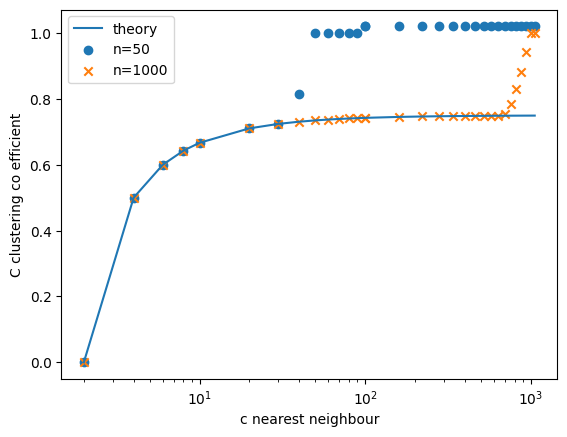

In [4]:


n_list=[50,1000]
c=6
# c_values= np.linspace(0,1000,10000)

cs_1 = np.array([2,4,6,8,10,20,30,40,50,60,70,80,90,100])

cs_2 = np.arange(start=100, stop=1100, step=60, dtype=int)
c_values = np.concatenate((cs_1,cs_2))
# for n in n_list:
c_list=[]
p=0
for n in n_list:
    temp=[]
    for c in c_values:
        amatrix = watts_strogatz_graph(n, c, p)
        temp.append(calculate_clustering_coefficient(amatrix))
    c_list.append(temp)

c_theory=[]
for c in c_values:
    numerator =3*(c-2)
    denominator = 4*(c-1)
    c_theory.append(numerator/denominator)
    # c_theory.append(c/(n-1))

print(len(c_values))
print(len(c_list[0]))

plt.semilogx(c_values,c_theory, label='theory')
plt.scatter(c_values, c_list[0], label= f'n={n_list[0]}' )
plt.scatter(c_values, c_list[1], label= f'n={n_list[1]}' ,marker='x')
# plt.xlim(1,1000)
plt.legend()
plt.xlabel('c nearest neighbour')
plt.ylabel('C clustering co efficient')
plt.show()
